In [1]:
#PROJECT FOR DATA ANALYSIS BY PALAK GUPTA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('netflix.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.shape

(8807, 12)

In [4]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [5]:
#Renaming Columns
df.rename(columns = {'listed_in':'genre'},inplace = True)
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genre', 'description'],
      dtype='object')

In [6]:
#Droping show id
df.drop(columns = 'show_id',inplace = True)

In [7]:
#Check duplicate values
df.duplicated().sum()

0

In [8]:
#Check missing values
df.isna().sum()

type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
genre              0
description        0
dtype: int64

In [9]:
#Droping the null rows of date_added since there are only 10
df.dropna(subset = ['date_added'],inplace = True)
df['date_added'].isna().sum()

0

In [10]:
#Droping rating columns
df.dropna(subset = ['rating'],inplace = True)
df['rating'].isna().sum()

0

In [11]:
#Droping duration columns
df.dropna(subset = ['duration'],inplace = True)
df['duration'].isna().sum()
df.isna().sum()

type               0
title              0
director        2621
cast             825
country          829
date_added         0
release_year       0
rating             0
duration           0
genre              0
description        0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8790 non-null   object
 1   title         8790 non-null   object
 2   director      6169 non-null   object
 3   cast          7965 non-null   object
 4   country       7961 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   genre         8790 non-null   object
 10  description   8790 non-null   object
dtypes: int64(1), object(10)
memory usage: 824.1+ KB


In [13]:
df.isna().sum()

type               0
title              0
director        2621
cast             825
country          829
date_added         0
release_year       0
rating             0
duration           0
genre              0
description        0
dtype: int64

In [14]:
#checking date_added to datetime format
df['date_added'] = pd.to_datetime(df['date_added'],errors = 'coerce') # coerce will ignore errors if any
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          8790 non-null   object        
 1   title         8790 non-null   object        
 2   director      6169 non-null   object        
 3   cast          7965 non-null   object        
 4   country       7961 non-null   object        
 5   date_added    8702 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   genre         8790 non-null   object        
 10  description   8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 824.1+ KB


In [15]:
#Adding day,month,year,month_name,day_name as separate columns to help with analysis
df['day'] = df['date_added'].dt.day
df['month'] = df['date_added'].dt.month
df['year'] = df['date_added'].dt.year
df['month_name'] = df['date_added'].dt.month_name()
df['weekdays'] = df['date_added'].dt.day_name()

In [16]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,day,month,year,month_name,weekdays
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",25.0,9.0,2021.0,September,Saturday
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24.0,9.0,2021.0,September,Friday
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",24.0,9.0,2021.0,September,Friday
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24.0,9.0,2021.0,September,Friday


In [17]:
#Checking for unique ratings
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [18]:
#Replace ratings into categories
df['rating'] = df['rating'].replace(['TV-Y','TV-Y7','G','TV-G','TV-PG','TV-Y7-FV'],'Kids')
df['rating'] = df['rating'].replace(['PG-13','TV-14'],'Teens')
df['rating'] = df['rating'].replace(['R','TV-MA','NC-17'],'Adults')
df['rating'] = df['rating'].replace(['NR','UR'],np.NaN)

In [19]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,day,month,year,month_name,weekdays
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,Teens,90 min,Documentaries,"As her father nears the end of his life, filmm...",25.0,9.0,2021.0,September,Saturday
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,Adults,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24.0,9.0,2021.0,September,Friday
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,Adults,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",24.0,9.0,2021.0,September,Friday
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24.0,9.0,2021.0,September,Friday


In [20]:
df['rating'].unique()

array(['Teens', 'Adults', 'PG', 'Kids', nan], dtype=object)

In [21]:
df['rating']

0        Teens
1       Adults
2       Adults
3       Adults
4       Adults
         ...  
8802    Adults
8803      Kids
8804    Adults
8805        PG
8806     Teens
Name: rating, Length: 8790, dtype: object

In [22]:
#Looking at null ratings
df['rating'].isna().sum()

82

In [23]:
#Droping the null ratings
df.dropna(subset = ['rating'],inplace = True)
df['rating'].isna().sum()

0

In [24]:
#Checking to see if there are any rows where all 3 columns--> director,country and cast are null
df[(df['director'].isna()) & (df['country'].isna()) & (df['cast'].isna())].shape[0]
df.shape

(8708, 16)

In [25]:
#Droping those 96 columns
df.dropna(subset = ['director','country','cast'],how = 'all',inplace = True)
df.shape

(8612, 16)

In [26]:
df['cast']

0                                                     NaN
1       Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...
2       Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...
4       Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...
5       Kate Siegel, Zach Gilford, Hamish Linklater, H...
                              ...                        
8801    Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...
8802    Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...
8804    Jesse Eisenberg, Woody Harrelson, Emma Stone, ...
8805    Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...
8806    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...
Name: cast, Length: 8612, dtype: object

In [27]:
#Working with cast column
df_cast = pd.DataFrame(df['cast'].apply(lambda x: str(x).split(', ')).tolist(),index = df['title'])
df_cast

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
title,,,,,,,,,,,,,,,,,,,,,
Dick Johnson Is Dead,nan,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Blood & Water,Ama Qamata,Khosi Ngema,Gail Mabalane,Thabang Molaba,Dillon Windvogel,Natasha Thahane,Arno Greeff,Xolile Tshabalala,Getmore Sithole,Cindy Mahlangu,...,None,None,None,None,None,None,None,None,None,None
Ganglands,Sami Bouajila,Tracy Gotoas,Samuel Jouy,Nabiha Akkari,Sofia Lesaffre,Salim Kechiouche,Noureddine Farihi,Geert Van Rampelberg,Bakary Diombera,None,...,None,None,None,None,None,None,None,None,None,None
Kota Factory,Mayur More,Jitendra Kumar,Ranjan Raj,Alam Khan,Ahsaas Channa,Revathi Pillai,Urvi Singh,Arun Kumar,None,None,...,None,None,None,None,None,None,None,None,None,None
Midnight Mass,Kate Siegel,Zach Gilford,Hamish Linklater,Henry Thomas,Kristin Lehman,Samantha Sloyan,Igby Rigney,Rahul Kohli,Annarah Cymone,Annabeth Gish,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zinzana,Ali Suliman,Saleh Bakri,Yasa,Ali Al-Jabri,Mansoor Alfeeli,Ahd,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Zodiac,Mark Ruffalo,Jake Gyllenhaal,Robert Downey Jr.,Anthony Edwards,Brian Cox,Elias Koteas,Donal Logue,John Carroll Lynch,Dermot Mulroney,Chloë Sevigny,...,None,None,None,None,None,None,None,None,None,None
Zombieland,Jesse Eisenberg,Woody Harrelson,Emma Stone,Abigail Breslin,Amber Heard,Bill Murray,Derek Graf,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [28]:
df_cast = df_cast.stack()
df_cast

title                  
Dick Johnson Is Dead  0                      nan
Blood & Water         0               Ama Qamata
                      1              Khosi Ngema
                      2            Gail Mabalane
                      3           Thabang Molaba
                                   ...          
Zubaan                3         Manish Chaudhary
                      4             Meghna Malik
                      5            Malkeet Rauni
                      6           Anita Shabdish
                      7    Chittaranjan Tripathy
Length: 64251, dtype: object

In [29]:
#Changing into DataFrame
df_cast = pd.DataFrame(df_cast)
df_cast

0
title                                        
Dick Johnson Is Dead 0                    nan
Blood & Water        0             Ama Qamata
                     1            Khosi Ngema
                     2          Gail Mabalane
                     3         Thabang Molaba
...                                       ...
Zubaan               3       Manish Chaudhary
                     4           Meghna Malik
                     5          Malkeet Rauni
                     6         Anita Shabdish
                     7  Chittaranjan Tripathy

[64251 rows x 1 columns]

In [30]:
df_cast.reset_index(inplace = True)
df_cast = df_cast[['title',0]]
df_cast.columns = ['title','cast']
df_cast.replace('nan',np.nan,inplace = True)
df_cast.isna().sum()

title      0
cast     712
dtype: int64

In [31]:
df_cast

,title,cast
0,Dick Johnson Is Dead,NaN
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
...,...,...
64246,Zubaan,Manish Chaudhary
64247,Zubaan,Meghna Malik
64248,Zubaan,Malkeet Rauni
64249,Zubaan,Anita Shabdish


In [32]:
#Doing same with genres
df_genre = pd.DataFrame(df['genre'].apply(lambda x: str(x).split(', ')).tolist(),index = df['title'])
df_genre

,0,1,2
title,,,
Dick Johnson Is Dead,Documentaries,None,None
Blood & Water,International TV Shows,TV Dramas,TV Mysteries
Ganglands,Crime TV Shows,International TV Shows,TV Action & Adventure
Kota Factory,International TV Shows,Romantic TV Shows,TV Comedies
Midnight Mass,TV Dramas,TV Horror,TV Mysteries
...,...,...,...
Zinzana,Dramas,International Movies,Thrillers
Zodiac,Cult Movies,Dramas,Thrillers
Zombieland,Comedies,Horror Movies,None


In [33]:
df_genre = df_genre.stack()
df_genre

title                  
Dick Johnson Is Dead  0               Documentaries
Blood & Water         0      International TV Shows
                      1                   TV Dramas
                      2                TV Mysteries
Ganglands             0              Crime TV Shows
                                     ...           
Zoom                  0    Children & Family Movies
                      1                    Comedies
Zubaan                0                      Dramas
                      1        International Movies
                      2            Music & Musicals
Length: 18937, dtype: object

In [34]:
df_genre = pd.DataFrame(df_genre)
df_genre

0
title                                           
Dick Johnson Is Dead 0             Documentaries
Blood & Water        0    International TV Shows
                     1                 TV Dramas
                     2              TV Mysteries
Ganglands            0            Crime TV Shows
...                                          ...
Zoom                 0  Children & Family Movies
                     1                  Comedies
Zubaan               0                    Dramas
                     1      International Movies
                     2          Music & Musicals

[18937 rows x 1 columns]

In [35]:
df_genre.reset_index(inplace = True)
df_genre = df_genre[['title',0]]
df_genre.columns = ['title','genre']
df_genre.replace('nan',np.NaN,inplace = True)
df_genre.isna().sum()

title    0
genre    0
dtype: int64

In [36]:
df_genre

,title,genre
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows
...,...,...
18932,Zoom,Children & Family Movies
18933,Zoom,Comedies
18934,Zubaan,Dramas
18935,Zubaan,International Movies


In [37]:
#Samw for director column
df_director = pd.DataFrame(df['director'].apply(lambda x: str(x).split(', ')).tolist(),index = df['title'])
df_director = df_director.stack()
df_director = pd.DataFrame(df_director)
df_director.reset_index(inplace = True)
df_director = df_director[['title',0]]
df_director.columns = ['title','director']
df_director.replace('nan',np.NaN,inplace = True)
df_director.isna().sum()

title          0
director    2521
dtype: int64

In [38]:
df_director

,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,NaN
2,Ganglands,Julien Leclercq
3,Kota Factory,NaN
4,Midnight Mass,Mike Flanagan
...,...,...
9403,Zinzana,Majid Al Ansari
9404,Zodiac,David Fincher
9405,Zombieland,Ruben Fleischer
9406,Zoom,Peter Hewitt


In [39]:
#Same for country column
df_country = pd.DataFrame(df['country'].apply(lambda x: str(x).split(', ')).tolist(),index = df['title'])
df_country = df_country.stack()
df_country = pd.DataFrame(df_country)
df_country.reset_index(inplace = True)
df_country = df_country[['title',0]]
df_country.columns = ['title','country']
df_country.replace('nan',np.NaN,inplace = True)
df_country.isna().sum()

title        0
country    733
dtype: int64

In [40]:
df_country

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,NaN
3,Kota Factory,India
4,Midnight Mass,NaN
...,...,...
10614,Zinzana,Jordan
10615,Zodiac,United States
10616,Zombieland,United States
10617,Zoom,United States


In [41]:
#Merging cast and genre on the basis of title
df12 = df_cast.merge(df_genre, on = 'title')
df12

,title,cast,genre
0,Dick Johnson Is Dead,NaN,Documentaries
1,Blood & Water,Ama Qamata,International TV Shows
2,Blood & Water,Ama Qamata,TV Dramas
3,Blood & Water,Ama Qamata,TV Mysteries
4,Blood & Water,Khosi Ngema,International TV Shows
...,...,...,...
147927,Zubaan,Anita Shabdish,International Movies
147928,Zubaan,Anita Shabdish,Music & Musicals
147929,Zubaan,Chittaranjan Tripathy,Dramas
147930,Zubaan,Chittaranjan Tripathy,International Movies


In [42]:
df123 = df_director.merge(df12, on = 'title')
df123

,title,director,cast,genre
0,Dick Johnson Is Dead,Kirsten Johnson,NaN,Documentaries
1,Blood & Water,NaN,Ama Qamata,International TV Shows
2,Blood & Water,NaN,Ama Qamata,TV Dramas
3,Blood & Water,NaN,Ama Qamata,TV Mysteries
4,Blood & Water,NaN,Khosi Ngema,International TV Shows
...,...,...,...,...
159583,Zubaan,Mozez Singh,Anita Shabdish,International Movies
159584,Zubaan,Mozez Singh,Anita Shabdish,Music & Musicals
159585,Zubaan,Mozez Singh,Chittaranjan Tripathy,Dramas
159586,Zubaan,Mozez Singh,Chittaranjan Tripathy,International Movies


In [43]:
df1234 = df_country.merge(df123, on = 'title')
df1234

,title,country,director,cast,genre
0,Dick Johnson Is Dead,United States,Kirsten Johnson,NaN,Documentaries
1,Blood & Water,South Africa,NaN,Ama Qamata,International TV Shows
2,Blood & Water,South Africa,NaN,Ama Qamata,TV Dramas
3,Blood & Water,South Africa,NaN,Ama Qamata,TV Mysteries
4,Blood & Water,South Africa,NaN,Khosi Ngema,International TV Shows
...,...,...,...,...,...
199945,Zubaan,India,Mozez Singh,Anita Shabdish,International Movies
199946,Zubaan,India,Mozez Singh,Anita Shabdish,Music & Musicals
199947,Zubaan,India,Mozez Singh,Chittaranjan Tripathy,Dramas
199948,Zubaan,India,Mozez Singh,Chittaranjan Tripathy,International Movies


In [44]:
#Merging this df with original df
df_new = df.merge(df1234, on = 'title')
df_new

,type,title,director_x,cast_x,country_x,date_added,release_year,rating,duration,genre_x,description,day,month,year,month_name,weekdays,country_y,director_y,cast_y,genre_y
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,Teens,90 min,Documentaries,"As her father nears the end of his life, filmm...",25.0,9.0,2021.0,September,Saturday,United States,Kirsten Johnson,NaN,Documentaries
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,NaN,Ama Qamata,International TV Shows
2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,NaN,Ama Qamata,TV Dramas
3,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,NaN,Ama Qamata,TV Mysteries
4,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,NaN,Khosi Ngema,International TV Shows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199945,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,Teens,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2.0,3.0,2019.0,March,Saturday,India,Mozez Singh,Anita Shabdish,International Movies
199946,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,Teens,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2.0,3.0,2019.0,March,Saturday,India,Mozez Singh,Anita Shabdish,Music & Musicals
199947,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,Teens,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2.0,3.0,2019.0,March,Saturday,India,Mozez Singh,Chittaranjan Tripathy,Dramas
199948,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,Teens,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2.0,3.0,2019.0,March,Saturday,India,Mozez Singh,Chittaranjan Tripathy,International Movies


In [45]:
#Droping waste columns and renaming cleaned columns
df_new.drop(columns = ['cast_x','country_x','director_x','genre_x'],inplace = True)
df_new.rename(columns = {'country_y':'country','director_y':'director','cast_y':'cast','genre_y':'genre'},inplace = True)
df_new.head()

,type,title,date_added,release_year,rating,duration,description,day,month,year,month_name,weekdays,country,director,cast,genre
0,Movie,Dick Johnson Is Dead,2021-09-25,2020,Teens,90 min,"As her father nears the end of his life, filmm...",25.0,9.0,2021.0,September,Saturday,United States,Kirsten Johnson,NaN,Documentaries
1,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,NaN,Ama Qamata,International TV Shows
2,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,NaN,Ama Qamata,TV Dramas
3,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,NaN,Ama Qamata,TV Mysteries
4,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,NaN,Khosi Ngema,International TV Shows


In [46]:
df_new.isna().sum()

type                0
title               0
date_added       1546
release_year        0
rating              0
duration            0
description         0
day              1546
month            1546
year             1546
month_name       1546
weekdays         1546
country         11710
director        50116
cast             1894
genre               0
dtype: int64

In [47]:
df_new['cast'] = df_new['cast'].replace(np.NaN,'Unknown')
df_new['country'] = df_new['country'].replace(np.NaN,'Unknown')
df_new['director'] = df_new['director'].replace(np.NaN,'Unknown')

In [48]:
df_new.head()

,type,title,date_added,release_year,rating,duration,description,day,month,year,month_name,weekdays,country,director,cast,genre
0,Movie,Dick Johnson Is Dead,2021-09-25,2020,Teens,90 min,"As her father nears the end of his life, filmm...",25.0,9.0,2021.0,September,Saturday,United States,Kirsten Johnson,Unknown,Documentaries
1,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,Unknown,Ama Qamata,International TV Shows
2,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,Unknown,Ama Qamata,TV Dramas
3,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,Unknown,Ama Qamata,TV Mysteries
4,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,Unknown,Khosi Ngema,International TV Shows


In [49]:
df_new.isna().sum()

type               0
title              0
date_added      1546
release_year       0
rating             0
duration           0
description        0
day             1546
month           1546
year            1546
month_name      1546
weekdays        1546
country            0
director           0
cast               0
genre              0
dtype: int64

In [50]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199950 entries, 0 to 199949
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   type          199950 non-null  object        
 1   title         199950 non-null  object        
 2   date_added    198404 non-null  datetime64[ns]
 3   release_year  199950 non-null  int64         
 4   rating        199950 non-null  object        
 5   duration      199950 non-null  object        
 6   description   199950 non-null  object        
 7   day           198404 non-null  float64       
 8   month         198404 non-null  float64       
 9   year          198404 non-null  float64       
 10  month_name    198404 non-null  object        
 11  weekdays      198404 non-null  object        
 12  country       199950 non-null  object        
 13  director      199950 non-null  object        
 14  cast          199950 non-null  object        
 15  genre         199

In [51]:
df_new.dropna(inplace = True)

In [52]:
df_new.isna().sum()

type            0
title           0
date_added      0
release_year    0
rating          0
duration        0
description     0
day             0
month           0
year            0
month_name      0
weekdays        0
country         0
director        0
cast            0
genre           0
dtype: int64

In [53]:
#Droping duplicates
df_new.drop_duplicates(keep = 'first',inplace = True)

In [54]:
df_new.shape

(198349, 16)

In [55]:
#Dividing the df on the basis of TV Shows and Movies
df_movies = df_new.loc[df_new['type']=='Movie']
df_tvs = df_new.loc[df_new['type']=='TV Show']

In [56]:
df_movies.shape

(144240, 16)

In [57]:
df_tvs.shape

(54109, 16)

In [58]:
#Replacing 'min' in Movie duration with empty string
df_movies['duration'] = df_movies['duration'].str.replace('min','')
df_movies.head()

,type,title,date_added,release_year,rating,duration,description,day,month,year,month_name,weekdays,country,director,cast,genre
0,Movie,Dick Johnson Is Dead,2021-09-25,2020,Teens,90,"As her father nears the end of his life, filmm...",25.0,9.0,2021.0,September,Saturday,United States,Kirsten Johnson,Unknown,Documentaries
157,Movie,My Little Pony: A New Generation,2021-09-24,2021,PG,91,Equestria's divided. But a bright-eyed hero be...,24.0,9.0,2021.0,September,Friday,Unknown,Robert Cullen,Vanessa Hudgens,Children & Family Movies
158,Movie,My Little Pony: A New Generation,2021-09-24,2021,PG,91,Equestria's divided. But a bright-eyed hero be...,24.0,9.0,2021.0,September,Friday,Unknown,Robert Cullen,Kimiko Glenn,Children & Family Movies
159,Movie,My Little Pony: A New Generation,2021-09-24,2021,PG,91,Equestria's divided. But a bright-eyed hero be...,24.0,9.0,2021.0,September,Friday,Unknown,Robert Cullen,James Marsden,Children & Family Movies
160,Movie,My Little Pony: A New Generation,2021-09-24,2021,PG,91,Equestria's divided. But a bright-eyed hero be...,24.0,9.0,2021.0,September,Friday,Unknown,Robert Cullen,Sofia Carson,Children & Family Movies


In [59]:
#Doing same with TV Shows and replace 'seasons'
df_tvs['duration'] = df_tvs['duration'].str.replace('Seasons',"")
df_tvs['duration'] = df_tvs['duration'].str.replace('Season',"")
df_tvs.head()

,type,title,date_added,release_year,rating,duration,description,day,month,year,month_name,weekdays,country,director,cast,genre
1,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,Unknown,Ama Qamata,International TV Shows
2,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,Unknown,Ama Qamata,TV Dramas
3,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,Unknown,Ama Qamata,TV Mysteries
4,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,Unknown,Khosi Ngema,International TV Shows
5,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,Unknown,Khosi Ngema,TV Dramas


In [60]:
#Renaming duration to seasons for TV Shows
df_tvs.rename(columns = {'duration':'Seasons'},inplace = True)
df_tvs.head()

,type,title,date_added,release_year,rating,Seasons,description,day,month,year,month_name,weekdays,country,director,cast,genre
1,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,Unknown,Ama Qamata,International TV Shows
2,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,Unknown,Ama Qamata,TV Dramas
3,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,Unknown,Ama Qamata,TV Mysteries
4,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,Unknown,Khosi Ngema,International TV Shows
5,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,Unknown,Khosi Ngema,TV Dramas


In [61]:
df_new.head()

,type,title,date_added,release_year,rating,duration,description,day,month,year,month_name,weekdays,country,director,cast,genre
0,Movie,Dick Johnson Is Dead,2021-09-25,2020,Teens,90 min,"As her father nears the end of his life, filmm...",25.0,9.0,2021.0,September,Saturday,United States,Kirsten Johnson,Unknown,Documentaries
1,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,Unknown,Ama Qamata,International TV Shows
2,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,Unknown,Ama Qamata,TV Dramas
3,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,Unknown,Ama Qamata,TV Mysteries
4,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,Unknown,Khosi Ngema,International TV Shows


In [62]:
df.groupby('type')['type'].count()

type
Movie      6031
TV Show    2581
Name: type, dtype: int64

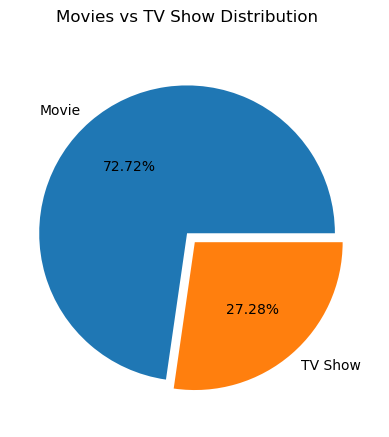

<Figure size 640x480 with 0 Axes>

In [63]:
#Plotting a pie chart
labels = ['Movie','TV Show']
plt.pie(df_new.groupby('type')['type'].count(),labels = labels,explode = (0.08,0),autopct = '%1.2f%%')
plt.suptitle('Movies vs TV Show Distribution')
plt.show()
plt.savefig('1.png')

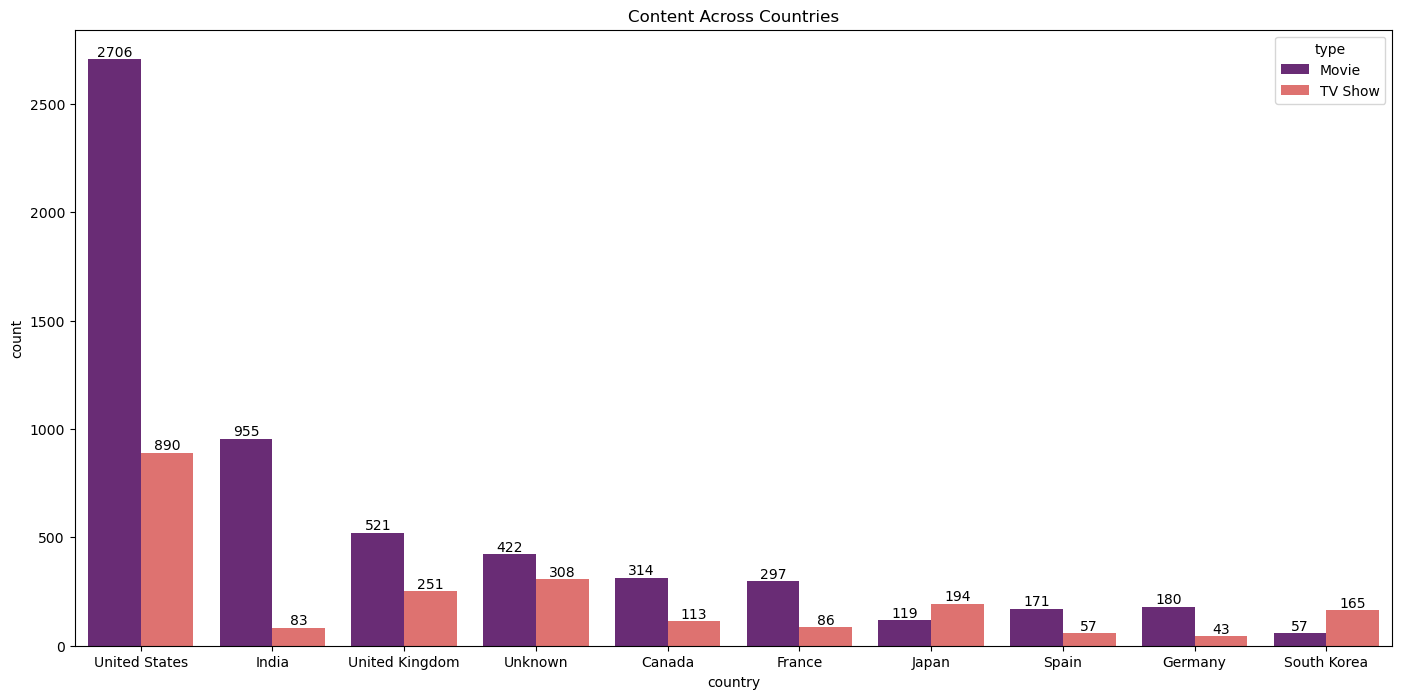

<Figure size 640x480 with 0 Axes>

In [64]:
#Making a bar plot
df_temp = df_new.drop_duplicates(subset = ['country','title']) #Removing duplicates based on country and title
x = df_temp['country'].value_counts().head(10) #Top 10 countries

plt.figure(figsize = (17,8))
plt.title('Content Across Countries')
label = sns.countplot(data = df_temp, x = 'country',hue = 'type',order = x.index,palette="magma")
for i in label.containers:
    label.bar_label(i) #this will show numerical value of each bar plot

plt.show()
plt.savefig('2.jpg')

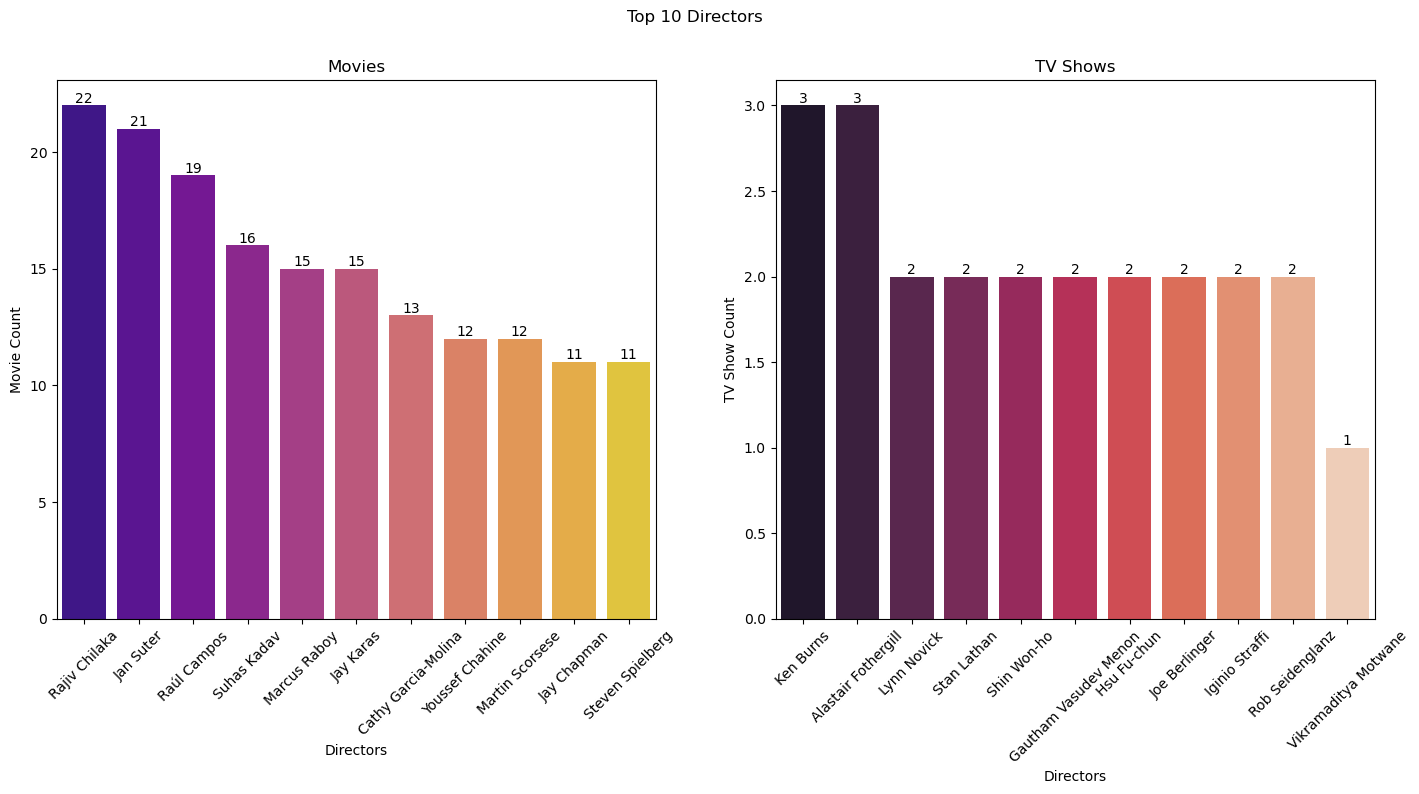

In [65]:
#Plotting Movies vs TV Shows based on directors 
df_movies_temp = df_movies.drop_duplicates(subset = ['director','title'])
df_tvs_temp = df_tvs.drop_duplicates(subset = ['director','title'])

plt.figure(figsize = (17,7))
plt.suptitle('Top 10 Directors')

plt.subplot(1,2,1)
label = sns.countplot(data = df_movies_temp,x = 'director',palette = 'plasma',
                      order = df_movies_temp['director'].value_counts()[1:12].index)
for i in label.containers:
    label.bar_label(i)
plt.title('Movies')
plt.xticks(rotation = 45)
plt.xlabel('Directors')
plt.ylabel('Movie Count')

plt.subplot(1,2,2)
label = sns.countplot(data = df_tvs_temp,x = 'director',palette = 'rocket',
                      order = df_tvs_temp['director'].value_counts()[1:12].index)
for i in label.containers:
    label.bar_label(i)
plt.title('TV Shows')
plt.xticks(rotation = 45)
plt.xlabel('Directors')
plt.ylabel('TV Show Count')

plt.show()

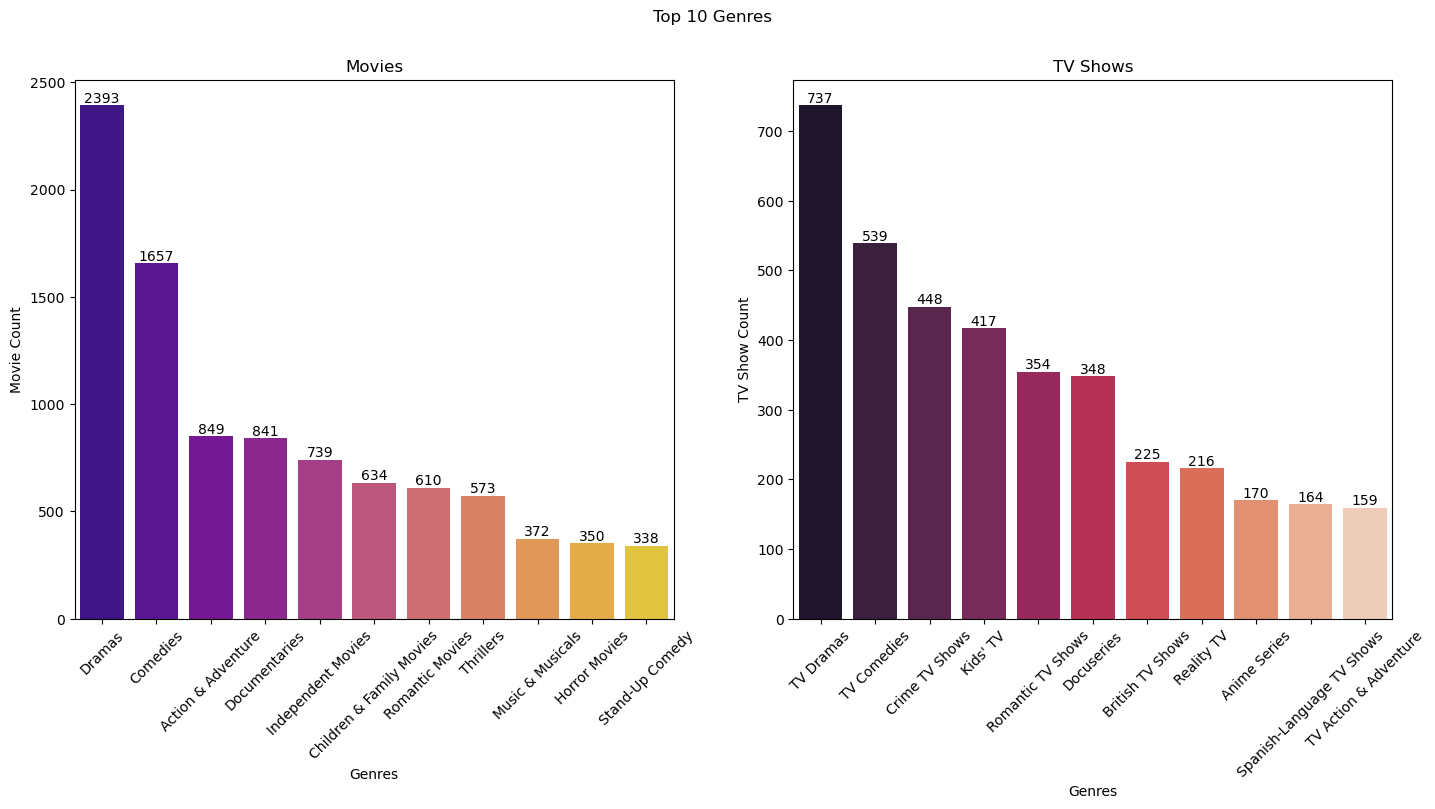

In [66]:
#PLotting Genres vs Show/Movie title based on directors
df_movies_temp = df_movies.drop_duplicates(subset = ['genre','title'])
df_tvs_temp = df_tvs.drop_duplicates(subset = ['genre','title'])

plt.figure(figsize = (17,7))
plt.suptitle('Top 10 Genres')

plt.subplot(1,2,1)
label = sns.countplot(data = df_movies_temp,x = 'genre',palette = 'plasma',
                      order = df_movies_temp['genre'].value_counts()[1:12].index)
for i in label.containers:
    label.bar_label(i)
plt.title('Movies')
plt.xticks(rotation = 45)
plt.xlabel('Genres')
plt.ylabel('Movie Count')

plt.subplot(1,2,2)
label = sns.countplot(data = df_tvs_temp,x = 'genre',palette = 'rocket',
                      order = df_tvs_temp['genre'].value_counts()[1:12].index)
for i in label.containers:
    label.bar_label(i)
plt.title('TV Shows')
plt.xticks(rotation = 45)
plt.xlabel('Genres')
plt.ylabel('TV Show Count')

plt.show()

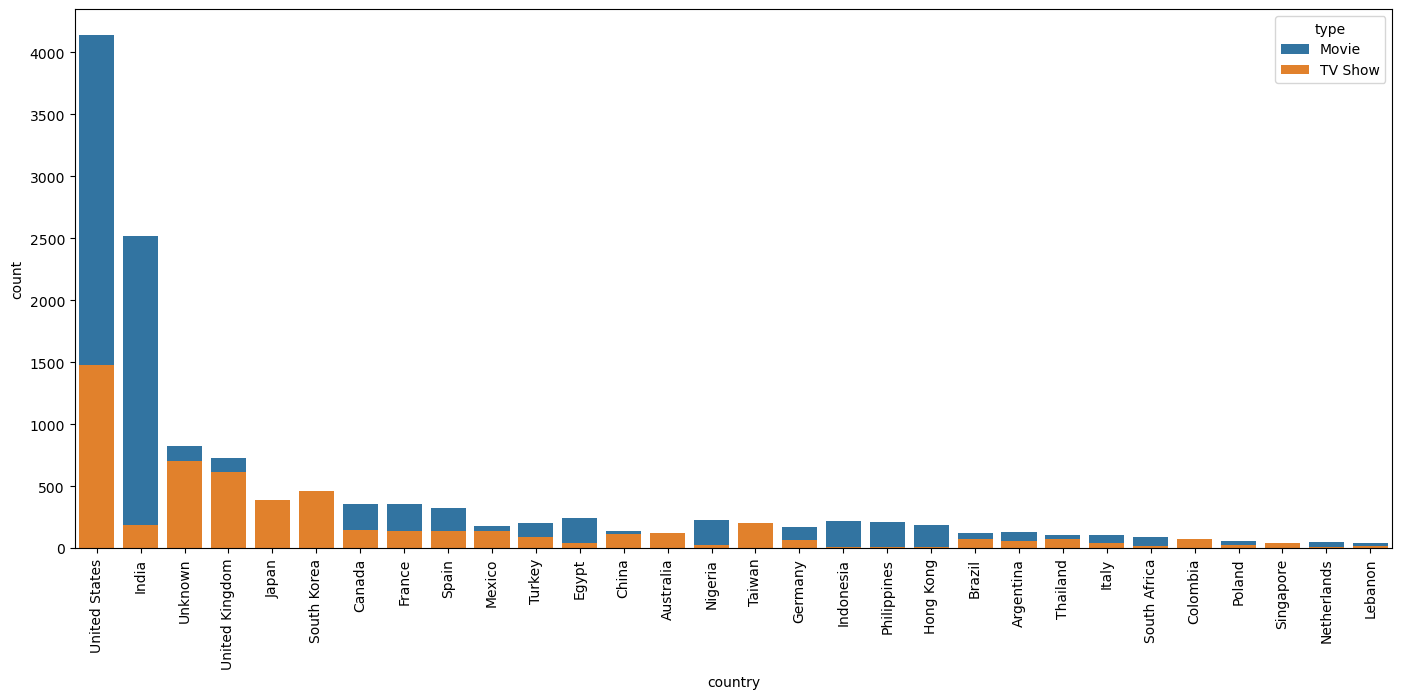

In [67]:
#Movies and TV Shows per country
df_temp = df_new.drop_duplicates(subset = ['genre','title'])
plt.figure(figsize = (17,7))
plt.xticks(rotation = 90)
sns.countplot(data = df_temp, x = 'country', hue = 'type',dodge = False,order = df_temp['country'].value_counts().head(30).index)
plt.show()

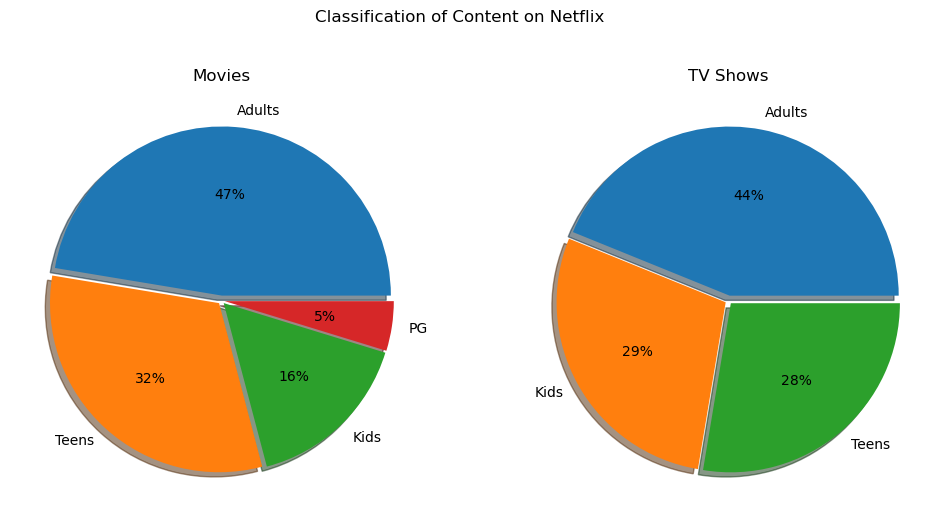

In [69]:
#Pie chart based on content rating
df_movies_temp = df_movies.drop_duplicates(subset = ['rating','title'])
df_tvs_temp = df_tvs.drop_duplicates(subset = ['rating','title'])

plt.figure(figsize = (12,6))
plt.suptitle('Classification of Content on Netflix')

plt.subplot(1,2,1)
plt.pie(df_movies_temp['rating'].value_counts(), labels = df_movies_temp['rating'].value_counts().index,
        autopct = '%.0f%%',explode = (0.03,0.02,0.02,0.02),shadow = True)
plt.title('Movies')

plt.subplot(1,2,2)
plt.pie(df_tvs_temp['rating'].value_counts(), labels = df_tvs_temp['rating'].value_counts().index,
        autopct = '%.0f%%',explode = (0.03,0.02,0.02),shadow = True)
plt.title('TV Shows')

plt.show()

In [70]:
df_tvs_temp['rating'].value_counts().index

Index(['Adults', 'Kids', 'Teens'], dtype='object', name='rating')

In [71]:
df_movies_temp['rating'].value_counts().index

Index(['Adults', 'Teens', 'Kids', 'PG'], dtype='object', name='rating')

In [72]:
#Movie releases by year, month and day
df_movies_temp = df_movies.drop_duplicates(subset = ['year','title'])

mv_year = df_movies_temp['year'].value_counts()
mv_year.sort_index(inplace = True)

month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
mv_month = df_movies_temp['month_name'].value_counts().loc[month_order]

day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
mv_day = df_movies_temp['weekdays'].value_counts().loc[day_order]

In [73]:
mv_month

month_name
January      535
February     375
March        518
April        542
May          433
June         485
July         559
August       515
September    510
October      535
November     489
December     535
Name: count, dtype: int64

In [74]:
mv_day

weekdays
Monday        612
Tuesday       842
Wednesday     895
Thursday     1040
Friday       1537
Saturday      543
Sunday        562
Name: count, dtype: int64

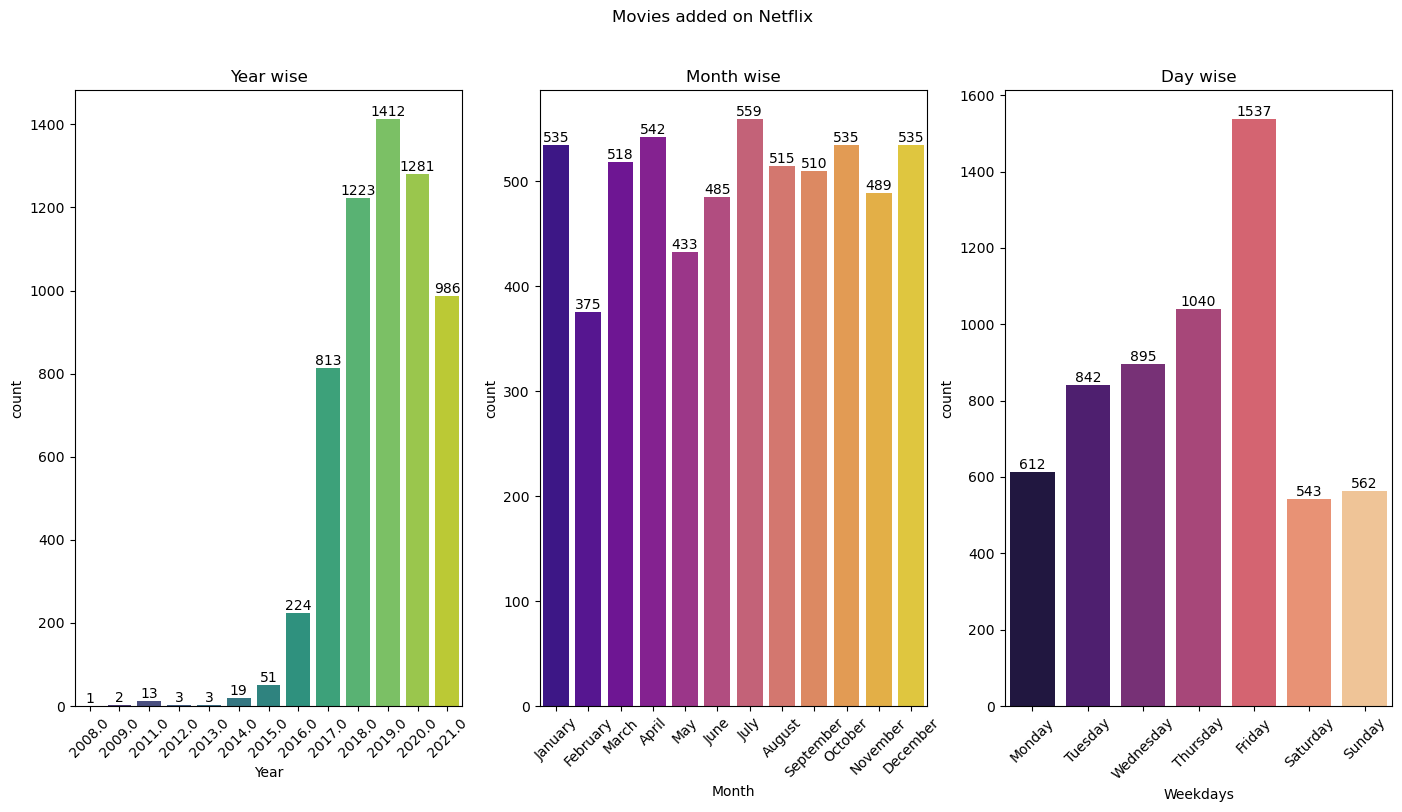

In [75]:
#Plotting the graph
plt.figure(figsize = (17,8))
plt.suptitle('Movies added on Netflix')

plt.subplot(1,3,1)
label = sns.countplot(data = df_movies_temp,x = 'year',order = mv_year.index,palette = 'viridis')
for i in label.containers:
    label.bar_label(i)
plt.xticks(rotation = 45)
plt.xlabel('Year')
plt.title('Year wise')

plt.subplot(1,3,2)
label = sns.countplot(data = df_movies_temp,x = 'month_name',order = mv_month.index,palette = 'plasma')
for i in label.containers:
    label.bar_label(i)
plt.xticks(rotation = 45)
plt.xlabel('Month')
plt.title('Month wise')

plt.subplot(1,3,3)
label = sns.countplot(data = df_movies_temp,x = 'weekdays',order = mv_day.index,palette = 'magma')
for i in label.containers:
    label.bar_label(i)
plt.xticks(rotation = 45)
plt.xlabel('Weekdays')
plt.title('Day wise')

plt.show()

In [76]:
#TV Shows releases by year, month and day
df_tvs_temp = df_tvs.drop_duplicates(subset = ['year','title'])

mv_year = df_tvs_temp['year'].value_counts()
mv_year.sort_index(inplace = True)

month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
mv_month = df_tvs_temp['month_name'].value_counts().loc[month_order]

day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
mv_day = df_tvs_temp['weekdays'].value_counts().loc[day_order]

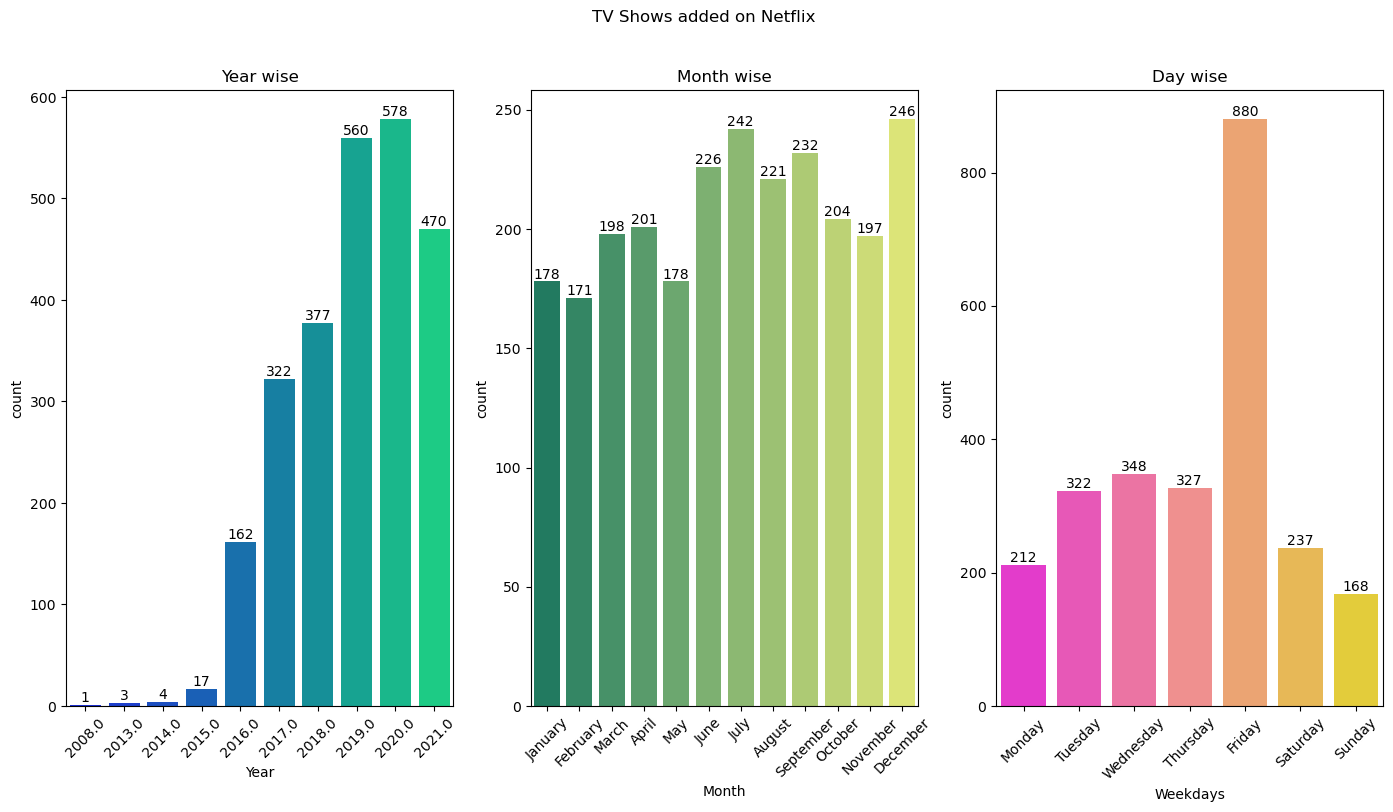

In [77]:
#Pltting the graph
plt.figure(figsize = (17,8))
plt.suptitle('TV Shows added on Netflix')

plt.subplot(1,3,1)
label = sns.countplot(data = df_tvs_temp,x = 'year',order = mv_year.index,palette = 'winter')
for i in label.containers:
    label.bar_label(i)
plt.xticks(rotation = 45)
plt.xlabel('Year')
plt.title('Year wise')

plt.subplot(1,3,2)
label = sns.countplot(data = df_tvs_temp,x = 'month_name',order = mv_month.index,palette = 'summer')
for i in label.containers:
    label.bar_label(i)
plt.xticks(rotation = 45)
plt.xlabel('Month')
plt.title('Month wise')

plt.subplot(1,3,3)
label = sns.countplot(data = df_tvs_temp,x = 'weekdays',order = mv_day.index,palette = 'spring')
for i in label.containers:
    label.bar_label(i)
plt.xticks(rotation = 45)
plt.xlabel('Weekdays')
plt.title('Day wise')

plt.show()

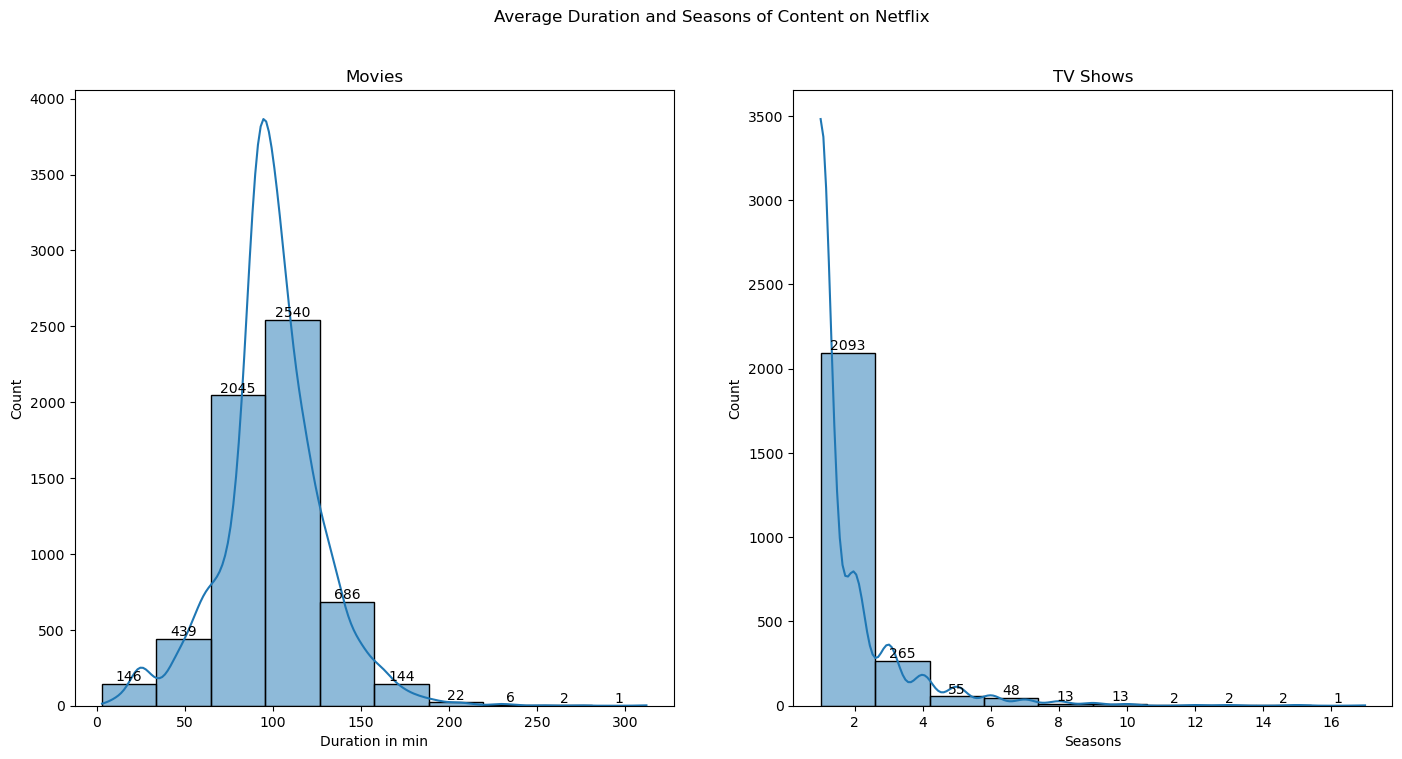

In [78]:
#Duration for content
df_movies_temp = df_movies.drop_duplicates(subset = ['duration','title'])
df_tvs_temp = df_tvs.drop_duplicates(subset = ['Seasons','title'])

#Plotting 
plt.figure(figsize = (17,8))
plt.suptitle('Average Duration and Seasons of Content on Netflix')

plt.subplot(1,2,1) #Hist plot for Movies
label = sns.histplot(df_movies_temp['duration'].astype(int),bins = 10,kde = True)
for i in label.containers:
    label.bar_label(i)
plt.xlabel('Duration in min')
plt.title('Movies')

plt.subplot(1,2,2) #Hist plot for TV Shows
label = sns.histplot(df_tvs_temp['Seasons'].astype(int),bins = 10,kde = True)
for i in label.containers:
    label.bar_label(i)
plt.xlabel('Seasons')
plt.title('TV Shows')

plt.show()

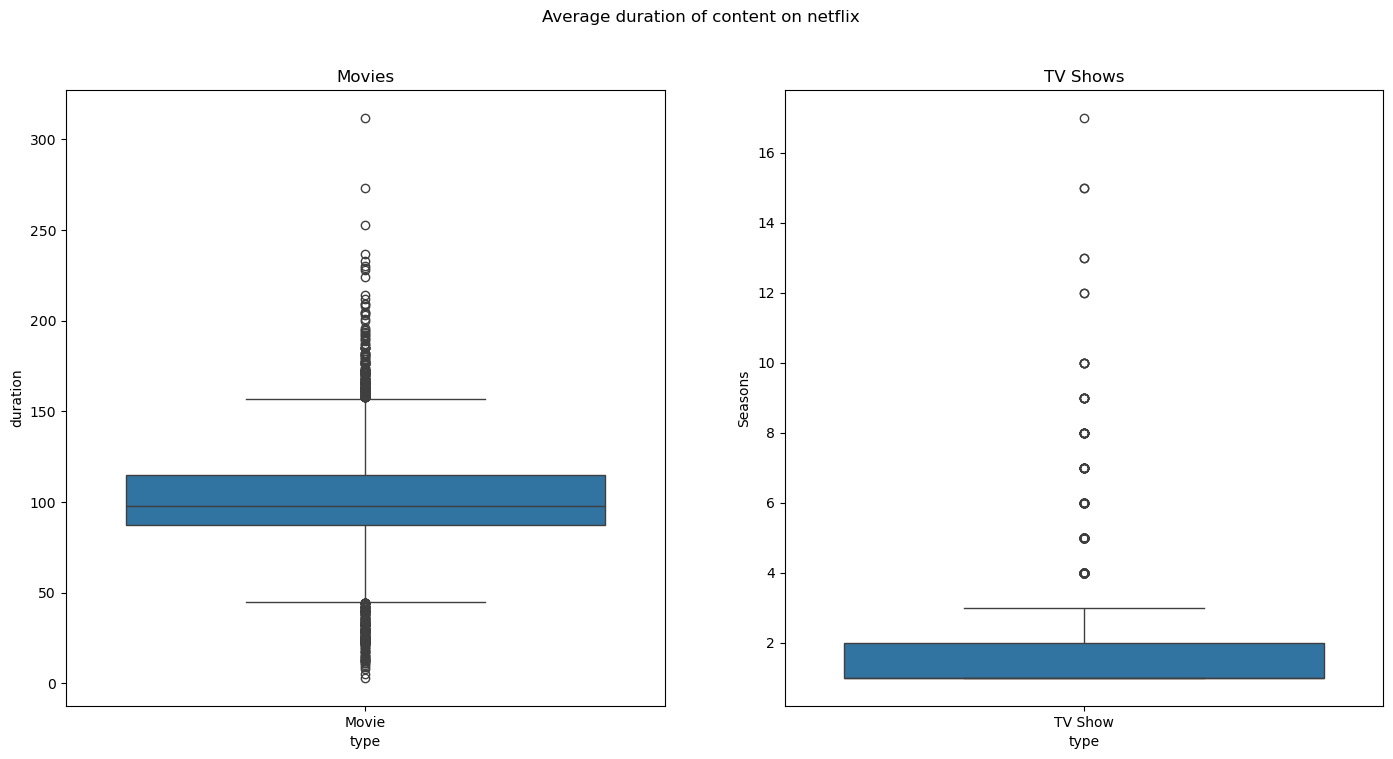

In [79]:
#Box plot is made to show the outliners in the data
df_movies_temp["duration"]=df_movies_temp["duration"].astype(int)
df_tvs_temp["Seasons"]=df_tvs_temp["Seasons"].astype(int)

plt.figure(figsize=(17,8))
plt.suptitle("Average duration of content on netflix ")

plt.subplot(1,2,1)
sns.boxplot(df_movies_temp,x="type",y="duration")
plt.title("Movies")

plt.subplot(1,2,2)
sns.boxplot(df_tvs_temp,x="type",y="Seasons")
plt.title("TV Shows")

plt.show()


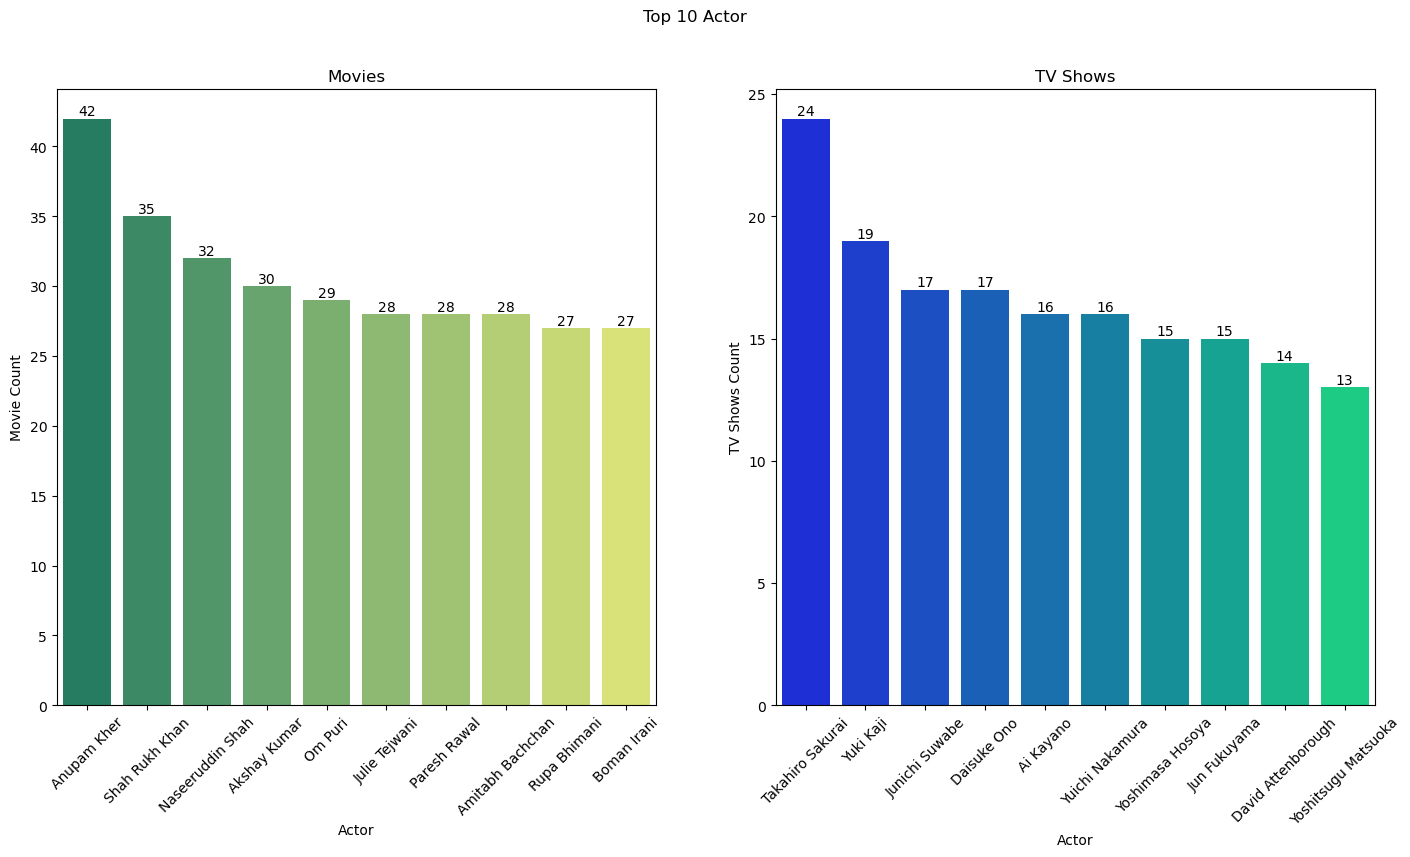

In [80]:
#Most active actors for Movies and TV Shows
df_movies_temp=df_movies.drop_duplicates(subset = ["cast","title"])
df_tvs_temp=df_tvs.drop_duplicates(subset =["cast","title"])


plt.figure(figsize=(17,8))
plt.suptitle("Top 10 Actor")

plt.subplot(1,2,1)
label=sns.countplot(data=df_movies_temp,x="cast",order=df_movies_temp['cast'].value_counts()[1:11].index,palette='summer')


for i in label.containers:
    label.bar_label(i)
plt.title("Movies")
plt.xticks(rotation=45)
plt.xlabel("Actor")
plt.ylabel("Movie Count")


plt.subplot(1,2,2)
label=sns.countplot(data=df_tvs_temp,x="cast",order=df_tvs_temp["cast"].value_counts()[1:11].index,palette='winter')


for i in label.containers:
    label.bar_label(i)

plt.title("TV Shows")
plt.xticks(rotation=45)
plt.xlabel("Actor")
plt.ylabel("TV Shows Count")

plt.show()
                                                   

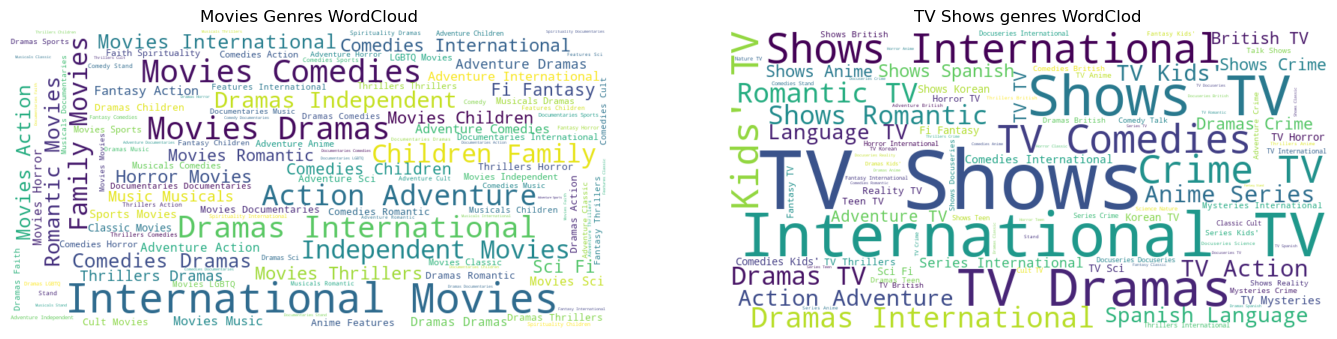

In [81]:
#WordCloud
genre_text=" ".join(df_movies["genre"])
wordcloud=WordCloud(width=800,height=400,background_color="white").generate(genre_text)

plt.figure(figsize=(17,10))

plt.subplot(1,2,1)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.title("Movies Genres WordCloud")

genre_text= " ".join(df_tvs["genre"])
wordcloud=WordCloud(width=800,height=400,background_color='white').generate(genre_text)

plt.subplot(1,2,2)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title("TV Shows genres WordClod")

plt.show()



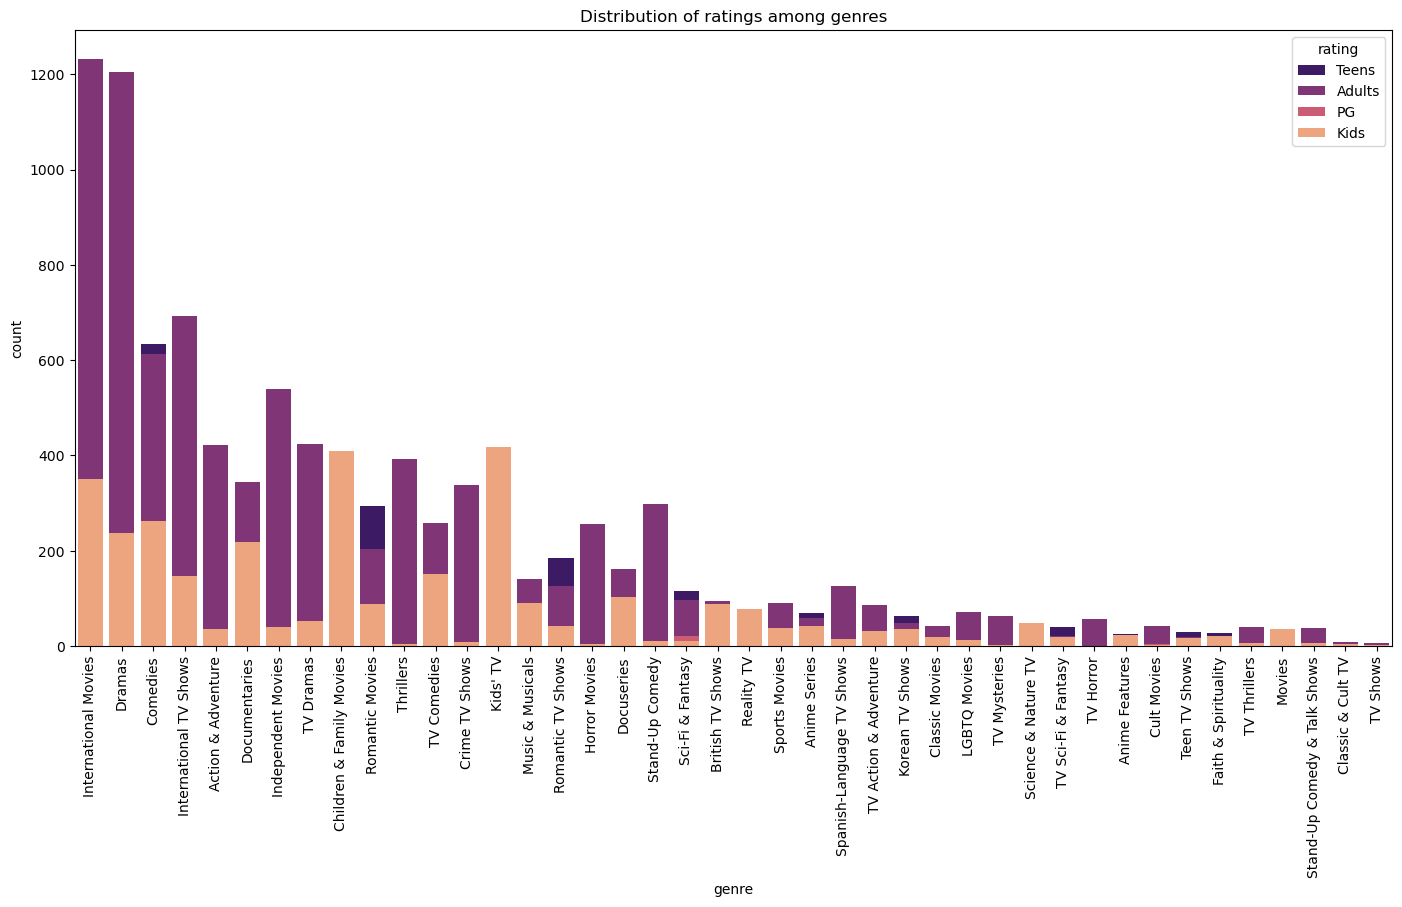

In [82]:
#Rating among genres
df_temp=df_new.drop_duplicates(subset=["genre","title"])

plt.figure(figsize=(17,8))
plt.title("Distribution of ratings among genres")
sns.countplot(data=df_temp,x="genre",hue="rating",dodge=False,order=df_temp["genre"].value_counts().index,palette="magma")

plt.xticks(rotation=90)
plt.show()


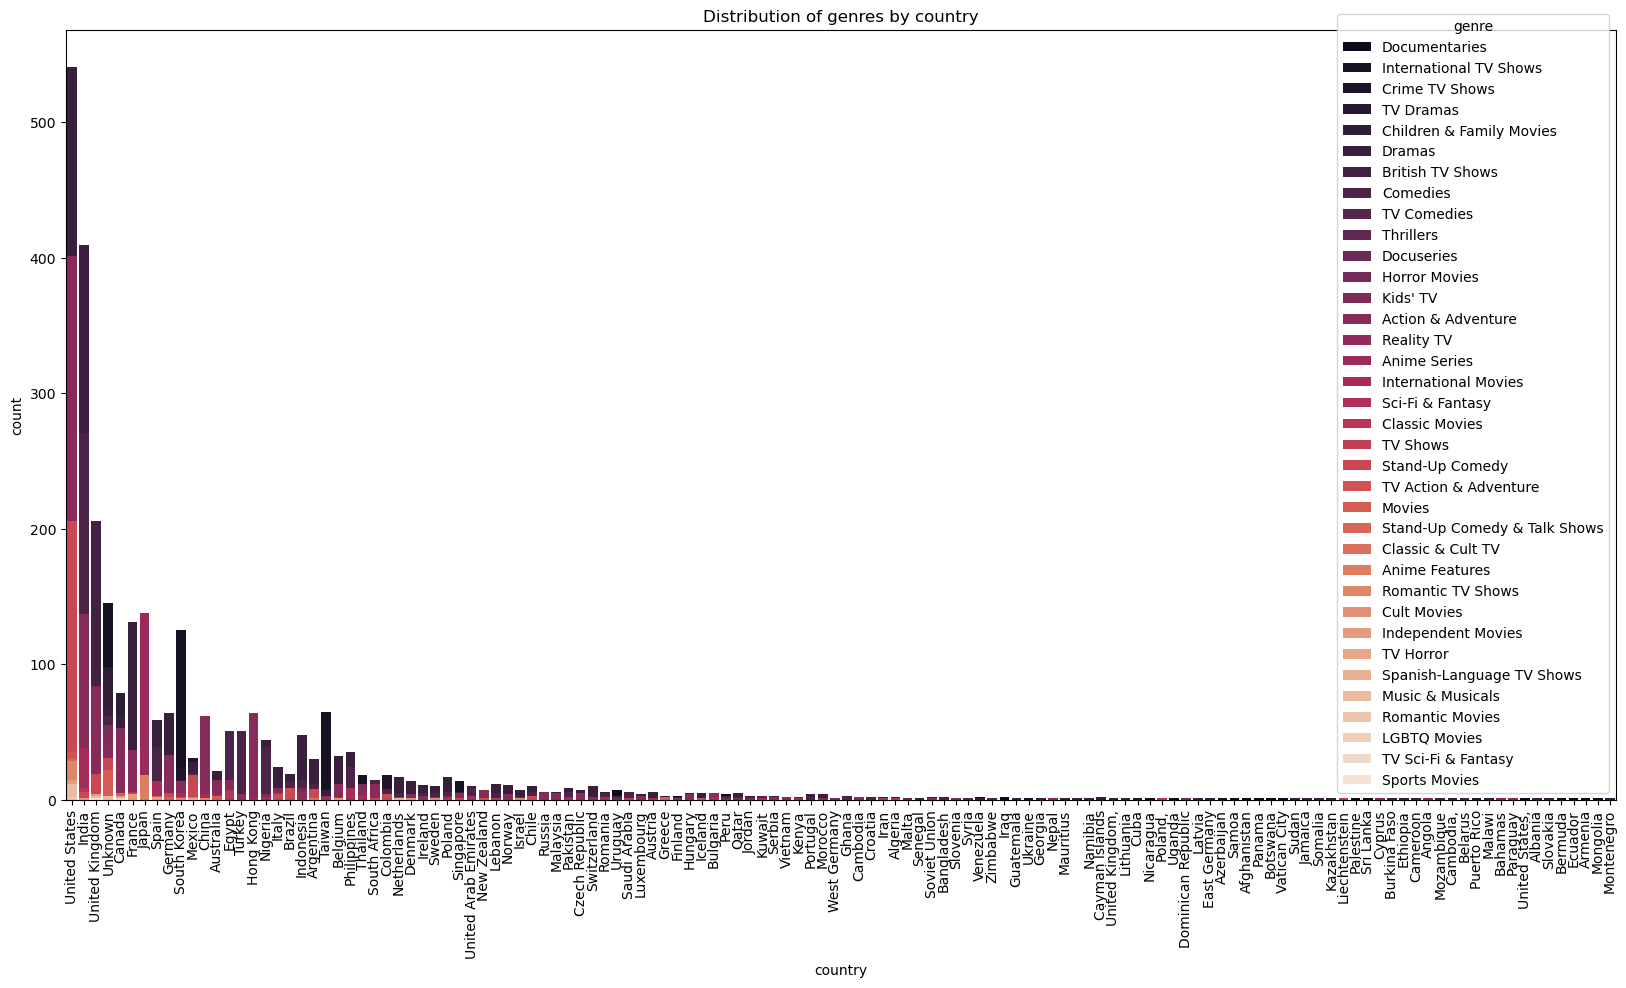

In [83]:
#Dist of genres by country
df_temp=df_new.drop_duplicates(subset=["country","title"])

plt.figure(figsize=(20,10))
plt.title("Distribution of genres by country")
sns.countplot(data=df_temp,x="country",hue="genre",dodge=False,order=df_temp["country"].value_counts().index,palette="rocket")

plt.xticks(rotation=90)
plt.show()


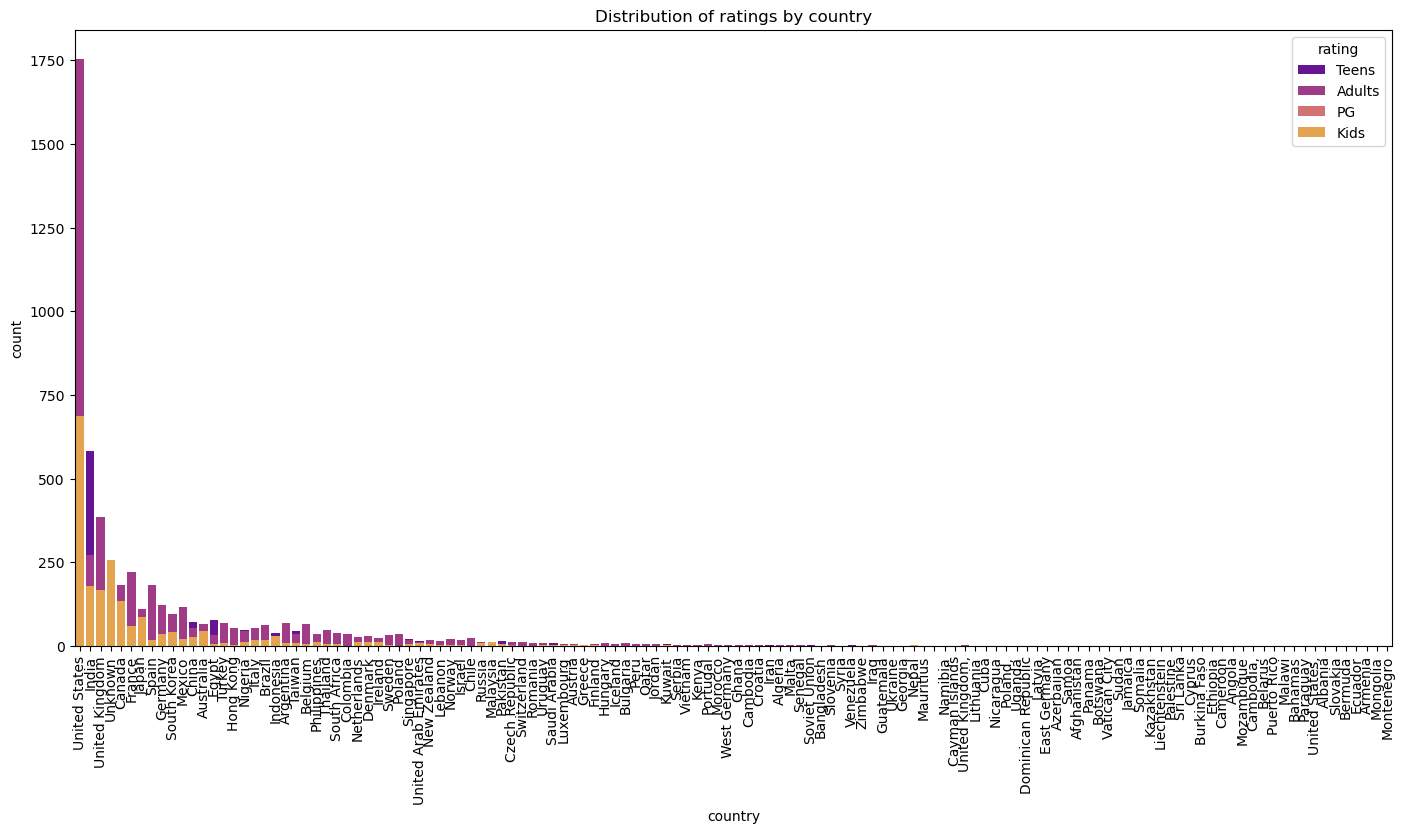

In [85]:
#Dist of ratings by country
df_temp=df_new.drop_duplicates(subset=["country","title"])

plt.figure(figsize=(17,8))
plt.title("Distribution of ratings by country")
sns.countplot(data=df_temp,x="country",hue="rating",dodge=False,order=df_temp["country"].value_counts().index,palette="plasma")

plt.xticks(rotation=90)
plt.show()
